In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import timeit

In [2]:
#create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add lat_lngs to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

In [5]:
#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city in unique then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

In [6]:
#print hte city count
len(cities)

611

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=227bf88c8a943d1dfa6f5286d28d8bfa


In [8]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create the counters
record_count = 1 
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        #convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #append the city information in to city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lng,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    #if error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that the data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bandarbeyla
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | san ignacio
Processing Record 9 of Set 1 | sakakah
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | komsomolskiy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | yeniseysk
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | andilamena
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | qasigiannguit
Processing Record 21 of Set 1 | pevek
Processin

Processing Record 30 of Set 4 | korla
Processing Record 31 of Set 4 | achisay
City not found. Skipping...
Processing Record 32 of Set 4 | manzanillo
Processing Record 33 of Set 4 | hofn
Processing Record 34 of Set 4 | new norfolk
Processing Record 35 of Set 4 | kirakira
Processing Record 36 of Set 4 | ilulissat
Processing Record 37 of Set 4 | severo-kurilsk
Processing Record 38 of Set 4 | vallenar
Processing Record 39 of Set 4 | ixtapa
Processing Record 40 of Set 4 | georgiyevskoye
Processing Record 41 of Set 4 | cortez
Processing Record 42 of Set 4 | alotau
City not found. Skipping...
Processing Record 43 of Set 4 | san vicente
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | mitsamiouli
Processing Record 46 of Set 4 | inta
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | camana
Processing Record 49 of Set 4 | kadaya
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Rec

Processing Record 21 of Set 8 | cairns
Processing Record 22 of Set 8 | kigoma
Processing Record 23 of Set 8 | lufilufi
Processing Record 24 of Set 8 | praia
Processing Record 25 of Set 8 | powell
Processing Record 26 of Set 8 | poum
Processing Record 27 of Set 8 | telford
Processing Record 28 of Set 8 | shelburne
Processing Record 29 of Set 8 | sarny
Processing Record 30 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 31 of Set 8 | uray
Processing Record 32 of Set 8 | tairua
Processing Record 33 of Set 8 | ozark
Processing Record 34 of Set 8 | bingol
Processing Record 35 of Set 8 | sechura
Processing Record 36 of Set 8 | umm kaddadah
Processing Record 37 of Set 8 | mookane
Processing Record 38 of Set 8 | sibolga
Processing Record 39 of Set 8 | vanimo
Processing Record 40 of Set 8 | sheridan
Processing Record 41 of Set 8 | wasilla
Processing Record 42 of Set 8 | tual
Processing Record 43 of Set 8 | victoria
Processing Record 44 of Set 8 | beringovskiy
Processing Reco

Processing Record 10 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 11 of Set 12 | hay river
Processing Record 12 of Set 12 | kusk
City not found. Skipping...
Processing Record 13 of Set 12 | isangel
Processing Record 14 of Set 12 | harnosand
Processing Record 15 of Set 12 | shalya
Processing Record 16 of Set 12 | sobolevo
Processing Record 17 of Set 12 | hunza
City not found. Skipping...
Processing Record 18 of Set 12 | voiron
Processing Record 19 of Set 12 | bayir
Processing Record 20 of Set 12 | grand gaube
Processing Record 21 of Set 12 | cervo
Processing Record 22 of Set 12 | pavullo nel frignano
Processing Record 23 of Set 12 | wenatchee
Processing Record 24 of Set 12 | deshna
City not found. Skipping...
Processing Record 25 of Set 12 | cape elizabeth
City not found. Skipping...
Processing Record 26 of Set 12 | delta del tigre
Processing Record 27 of Set 12 | ahipara
Processing Record 28 of Set 12 | tuatapere
Processing Record 29 of Set 12 | khristoforovo
Ci

In [9]:
len(city_data)

549

In [10]:
#convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quatre Cocos,57.7625,57.7625,75.09,77,22,14.92,MU,2021-10-25 15:13:17
1,Mataura,168.8643,168.8643,49.21,99,100,2.48,NZ,2021-10-25 15:13:18
2,Bandarbeyla,50.8122,50.8122,78.96,72,8,8.70,SO,2021-10-25 15:13:18
3,Leningradskiy,178.4167,178.4167,5.86,93,100,11.18,RU,2021-10-25 15:13:18
4,Ribeira Grande,-28.7000,-28.7000,72.00,68,40,8.05,PT,2021-10-25 15:13:19
5,San Ignacio,-89.0714,-89.0714,86.14,74,0,4.61,BZ,2021-10-25 15:10:14
6,Sakakah,40.2064,40.2064,77.72,19,0,5.59,SA,2021-10-25 15:13:19
7,Cayenne,-52.3333,-52.3333,82.09,83,75,4.00,GF,2021-10-25 15:13:01
8,Komsomolskiy,71.7189,71.7189,53.02,30,0,4.61,UZ,2021-10-25 15:13:19
9,Rikitea,-134.9692,-134.9692,74.43,74,100,18.32,PF,2021-10-25 15:13:20


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quatre Cocos,MU,2021-10-25 15:13:17,57.7625,57.7625,75.09,77,22,14.92
1,Mataura,NZ,2021-10-25 15:13:18,168.8643,168.8643,49.21,99,100,2.48
2,Bandarbeyla,SO,2021-10-25 15:13:18,50.8122,50.8122,78.96,72,8,8.70
3,Leningradskiy,RU,2021-10-25 15:13:18,178.4167,178.4167,5.86,93,100,11.18
4,Ribeira Grande,PT,2021-10-25 15:13:19,-28.7000,-28.7000,72.00,68,40,8.05
5,San Ignacio,BZ,2021-10-25 15:10:14,-89.0714,-89.0714,86.14,74,0,4.61
6,Sakakah,SA,2021-10-25 15:13:19,40.2064,40.2064,77.72,19,0,5.59
7,Cayenne,GF,2021-10-25 15:13:01,-52.3333,-52.3333,82.09,83,75,4.00
8,Komsomolskiy,UZ,2021-10-25 15:13:19,71.7189,71.7189,53.02,30,0,4.61
9,Rikitea,PF,2021-10-25 15:13:20,-134.9692,-134.9692,74.43,74,100,18.32


In [12]:
#create the output file in csv format
output_data_file = "weather_data/cities.csv"

#export the city_data into the csv
city_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
#extract relevant fields from the df for plotting
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

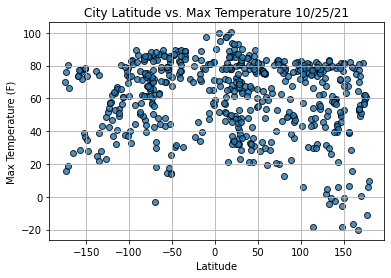

In [14]:
#import the time module
import time

#build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

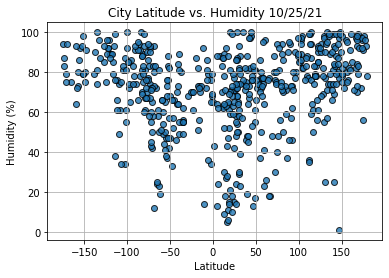

In [15]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

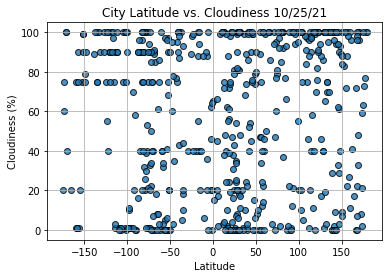

In [16]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

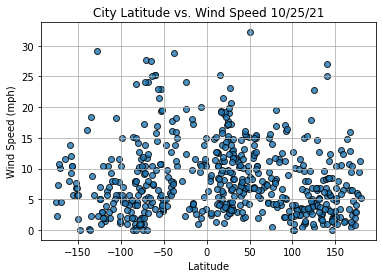

In [17]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [18]:
#import the linear regression module
from scipy.stats import linregress

#Create a function to create and perform a linear regression on the weather data with a line plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Create and run the regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line y-values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #create the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    #Create the scatter plot with regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    
    plt.show()

In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quatre Cocos,57.7625,57.7625,75.09,77,22,14.92,MU,2021-10-25 15:13:17
1,Mataura,168.8643,168.8643,49.21,99,100,2.48,NZ,2021-10-25 15:13:18
2,Bandarbeyla,50.8122,50.8122,78.96,72,8,8.70,SO,2021-10-25 15:13:18
3,Leningradskiy,178.4167,178.4167,5.86,93,100,11.18,RU,2021-10-25 15:13:18
6,Sakakah,40.2064,40.2064,77.72,19,0,5.59,SA,2021-10-25 15:13:19


In [20]:
len(northern_hemi_df)

333

In [21]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Ribeira Grande,-28.7000,-28.7000,72.00,68,40,8.05,PT,2021-10-25 15:13:19
5,San Ignacio,-89.0714,-89.0714,86.14,74,0,4.61,BZ,2021-10-25 15:10:14
7,Cayenne,-52.3333,-52.3333,82.09,83,75,4.00,GF,2021-10-25 15:13:01
9,Rikitea,-134.9692,-134.9692,74.43,74,100,18.32,PF,2021-10-25 15:13:20
11,Kahului,-156.4700,-156.4700,75.85,86,1,10.36,US,2021-10-25 15:13:20


In [22]:
len(southern_hemi_df)

216

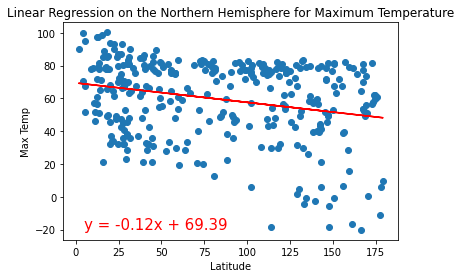

In [31]:
#Linear regression on the N hemisphere (Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (5, -20))


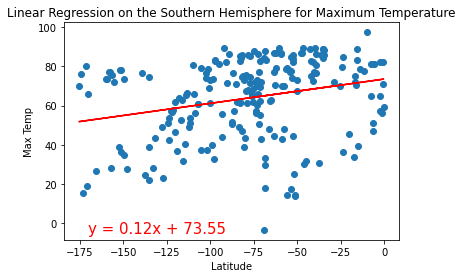

In [30]:
#Linear regression on the S hemisphere (Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-170, -5))


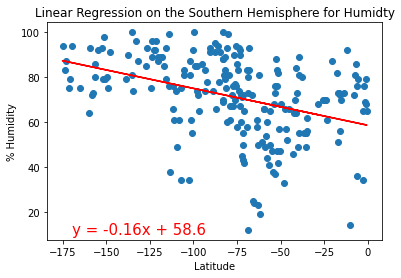

In [32]:
#Linear regression on the S hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Humidty', '% Humidity', (-170, 10))


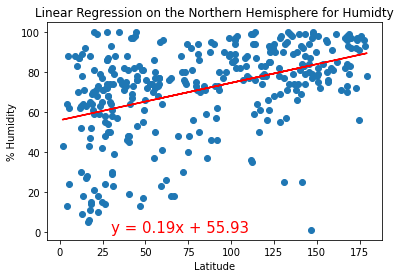

In [34]:
#Linear regression on the N hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Humidty', '% Humidity', (30, 0))


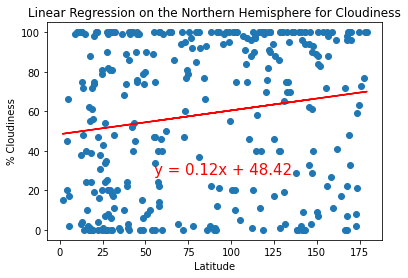

In [40]:
#Linear regression on the N hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness', (55, 28))


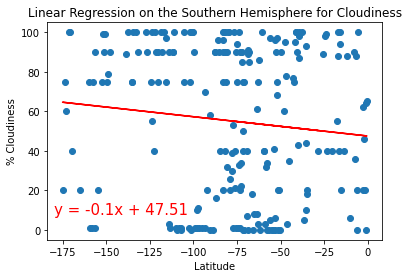

In [46]:
#Linear regression on the S hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Cloudiness', '% Cloudiness', (-180, 8))


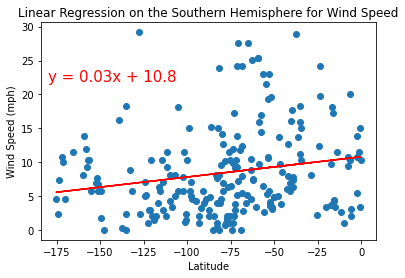

In [48]:
#Linear regression on the S hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-180, 22))


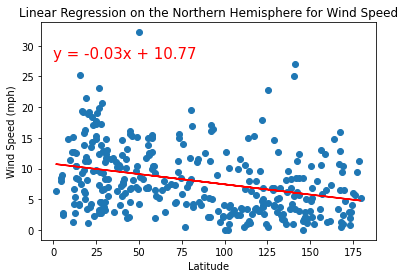

In [50]:
#Linear regression on the N hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (0, 28))
